# Exercises 3, answers

In [1]:
def objective_function(x):
    return (x[0]**2.0 + x[1]**2.0 + x[0] + 2.0 * x[1])

## Excercise 1

In [2]:
import math
def golden_section_line_search(a,b,f,L):
    x = a
    y = b
    while y-x>2*L:
        if f(x+(math.sqrt(5.0)-1)/2.0*(y-x))<f(y-(math.sqrt(5.0)-1)/2.0*(y-x)):
            x = y-(math.sqrt(5.0)-1)/2.0*(y-x)
        else:
            y = x+(math.sqrt(5.0)-1)/2.0*(y-x)
    return (x+y)/2

In [3]:
import numpy as np
import ad
def steepest_descent_withgolden(f,start,search_interval_length,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    d = float('Inf')
    while np.linalg.norm(d)>precision:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x))
        step = golden_section_line_search(0,
                                          search_interval_length/np.linalg.norm(d),
                                          lambda t: f(x+t*d),
                                          precision)
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [4]:
start = [1,1]
(x,f_new,steps1) = steepest_descent_withgolden(objective_function,
                                               start,3,0.0001)
print (x)
print(len(steps1))
print(steps1)

[-0.50000001 -1.00000001]
3
[[-0.5001359311561351, -1.0001812415415134], [-0.5000000076749562, -1.000000010233275], [-0.5000000076738548, -1.0000000102318063]]


## Exercise 2

In [5]:
import numpy as np
import ad
def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    d = float('Inf')
#    while abs(f_old-f_new)>precision and len(steps)<10:
    while np.linalg.norm(d)>precision and len(steps)<10:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x))
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [20]:
(x,f_new,steps2) = steepest_descent(objective_function,start,.2,0.0001)
print(x)
print(len(steps2))
print(steps2)

[-0.49093007 -0.98790676]
10
[[0.3999999999999999, 0.19999999999999996], [0.039999999999999925, -0.28], [-0.17600000000000005, -0.5680000000000001], [-0.30560000000000004, -0.7408], [-0.38336000000000003, -0.84448], [-0.430016, -0.906688], [-0.4580096, -0.9440128], [-0.47480576, -0.96640768], [-0.484883456, -0.979844608], [-0.4909300736, -0.9879067648]]


In [7]:
import matplotlib.pyplot as plt

def plot_2d_steps2(steps1,start1,steps2,start2):
    myvec1 = np.array([start1]+steps1).transpose()
    myvec2 = np.array([start2]+steps2).transpose()
    plt.plot(myvec2[0,],myvec2[1,],'bo')    
    plt.plot(myvec1[0,],myvec1[1,],'ro')
    return plt

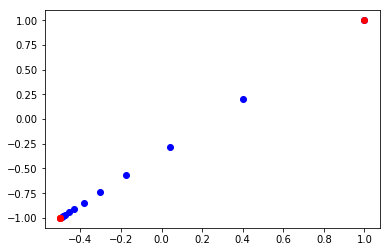

In [21]:
plot_2d_steps2(steps1,start,steps2,start).show()

## Exercise 3

$$y_k=\nabla f(x_k+s_k)-\nabla f(x_k),$$

$$H_{k+1}=H_{k}-\frac{H_k y_k y_k^T H_k}{y_k^T H_k y_k}+\frac{s_k s_k^T}{y_k^{T} s_k}$$

In [15]:
import ad
import numpy as np
def update_Hinv(H_inv_old,x_old,x_new,f):
    y = np.matrix(ad.gh(f)[0](x_new)-ad.gh(f)[0](x_old)).transpose()
    second_term = H_inv_old*y*y.transpose()*H_inv_old.transpose()/(y.transpose()*H_inv_old*y)
    s = np.matrix(x_new-x_old).transpose()
    third_term = s*s.transpose()/(y.transpose()*s)
    H_inv_new = H_inv_old-second_term+third_term
    return H_inv_new

In [16]:
import numpy as np
def quasi_newton_DFP(f,start,step,precision):
    f_old = float('Inf')
#    x_old = np.array([0]*len(start))
    x_new = np.array(start)
    steps = []
    f_new = f(x_new)
    # Use identity matrix as the first approximation (is positive definite)
    H_inv = np.eye(len(start))
    d = float('Inf')
#    while abs(f_old-f_new)>precision:
    while np.linalg.norm(d)>precision and len(steps)<10:
        d = (-H_inv*(np.matrix(ad.gh(f)[0](x_new)).transpose())).transpose()
        #Change the type from np.matrix to np.array so that we can use it in our function
        x_old = x_new
        f_old = f_new
        x_new = np.array(x_new+d*step)[0]
        f_new = f(x_new)
        steps.append(list(x_new))
        H_inv = update_Hinv(H_inv,x_old,x_new,f)
    return x_new,f_new,steps

In [24]:
(x,f_new,steps)=quasi_newton_DFP(objective_function,start,0.7,0.0001)
print(x)
print(len(steps))
print (steps)

[-0.50001181 -1.00001575]
10
[[-1.0999999999999996, -1.7999999999999998], [-0.6799999999999999, -1.24], [-0.5539999999999999, -1.072], [-0.5162, -1.0216], [-0.50486, -1.00648], [-0.5014580000000001, -1.001944], [-0.5004373999999999, -1.0005832000000001], [-0.5001312200000001, -1.0001749599999998], [-0.5000393659999999, -1.0000524880000001], [-0.5000118098000002, -1.0000157464]]


In [18]:
def plot_2d_steps(steps,start):
    myvec = np.array([start]+steps).transpose()
    plt.plot(myvec[0,],myvec[1,],'bo')
    return plt

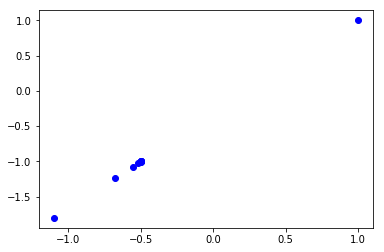

In [25]:
plot_2d_steps(steps,start).show()